# Import Packages

In [2]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

# Load the CSV Files Containing the Model Variables

In [3]:
gender = pd.read_csv('Gender Numerated.csv')
hub_plus = pd.read_csv('Hub+ Viewers.csv')
sim_only = pd.read_csv('Simulcast Only.csv')
male_platform = pd.read_csv('Male Platform.csv')
female_platform = pd.read_csv('Female Platform.csv')
male_os = pd.read_csv('Male OS.csv')
female_os = pd.read_csv('Female OS.csv')
male_isp = pd.read_csv('Male ISP.csv')
female_isp = pd.read_csv('Female ISP.csv')
male_browsers = pd.read_csv('Male Browser.csv')
female_browsers = pd.read_csv('Female Browsers.csv')
male_sub_genres = pd.read_csv('Male Sub-Genre.csv')
female_sub_genres = pd.read_csv('Female Sub-Genre.csv')
male_programmes = pd.read_csv('Gender Model Male Programmes.csv')
female_programmes = pd.read_csv('Gender Model Female Programmes.csv')

# Join all of the Query Output Files Together to Create the Modelling Dataset

In [4]:
from functools import reduce
data = reduce(lambda left,right: pd.merge(left,right,on = 'viewer_id'), 
                  [gender, hub_plus, sim_only, male_platform, female_platform, male_os, female_os, male_isp,
                   female_isp, male_browsers, female_browsers, male_sub_genres, female_sub_genres,
                   male_programmes, female_programmes])

In [5]:
data.head()

,viewer_id,gender,gender.1,hub_plus,sim_only,male_platform,female_platform,male_os,female_os,male_isp,female_isp,male_browser,female_browser,male_sub_genres,female_sub_genres,male_programmes,female_programmes
0,56b6eb76-d895-4437-b721-0bf7ca9ba6c3,M,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,5dba658c-8b7c-40e5-bf22-927b2f18bc3e,M,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
2,15a1bf95-2772-40c0-98d4-0db7cffbb8a4,M,0,0,1,0,1,1,1,0,0,1,0,0,1,0,0
3,23d647e9-0c33-47ab-aac6-f378a0b46e2c,F,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0
4,632c8eca-57b0-4360-b237-8f3cb7d19f19,F,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [6]:
data = data.set_index('viewer_id')

In [7]:
data.head()

,gender,gender.1,hub_plus,sim_only,male_platform,female_platform,male_os,female_os,male_isp,female_isp,male_browser,female_browser,male_sub_genres,female_sub_genres,male_programmes,female_programmes
viewer_id,,,,,,,,,,,,,,,,
56b6eb76-d895-4437-b721-0bf7ca9ba6c3,M,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5dba658c-8b7c-40e5-bf22-927b2f18bc3e,M,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
15a1bf95-2772-40c0-98d4-0db7cffbb8a4,M,0,0,1,0,1,1,1,0,0,1,0,0,1,0,0
23d647e9-0c33-47ab-aac6-f378a0b46e2c,F,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0
632c8eca-57b0-4360-b237-8f3cb7d19f19,F,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


# Create X and y Containing the Classification Variables and Target Variable

In [8]:
X = data[['hub_plus','sim_only','male_platform','female_platform','male_os','female_os','male_isp','female_isp',
          'male_browser','female_browser','male_sub_genres','female_sub_genres','male_programmes',
          'female_programmes']].values
y = data['gender.1'].values

# Implement Train-Test Split

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Train a K-Nearest Neighbours Model on the data

In [14]:
# Fitting clasifier to the Training set
# Loading libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

# Instantiate learning model (k = 3)
classifier = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Use the Yellowbrick Confusion Matrix Variant to Gauge the Performance of the Model

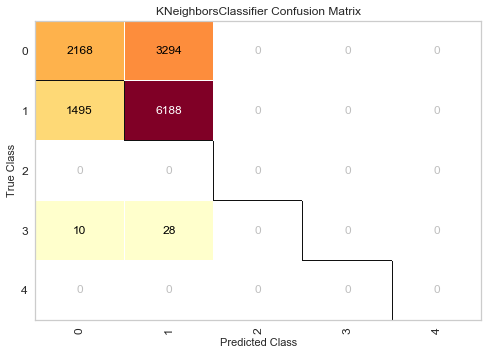

In [15]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(classifier, classes=[0,1,2,3,4])
cm.score(X_test, y_test)
cm.poof()

In [16]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 63.38 %.


# Tune the Number of Nearest Neighbours (K) Hyperparameter to Obtain the Most Accurate Model, Use 10-Fold Cross-Validation and Take the Mean Accuracy Score

In [19]:
#https://www.kaggle.com/skalskip/iris-data-visualization-and-knn-classification

# creating list of K for KNN
k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

C:\Users\ryanwala\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\ryanwala\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\ryanwala\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\ryanwala\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\mode

# Plot the Misclassification Error for the Values of K From Above

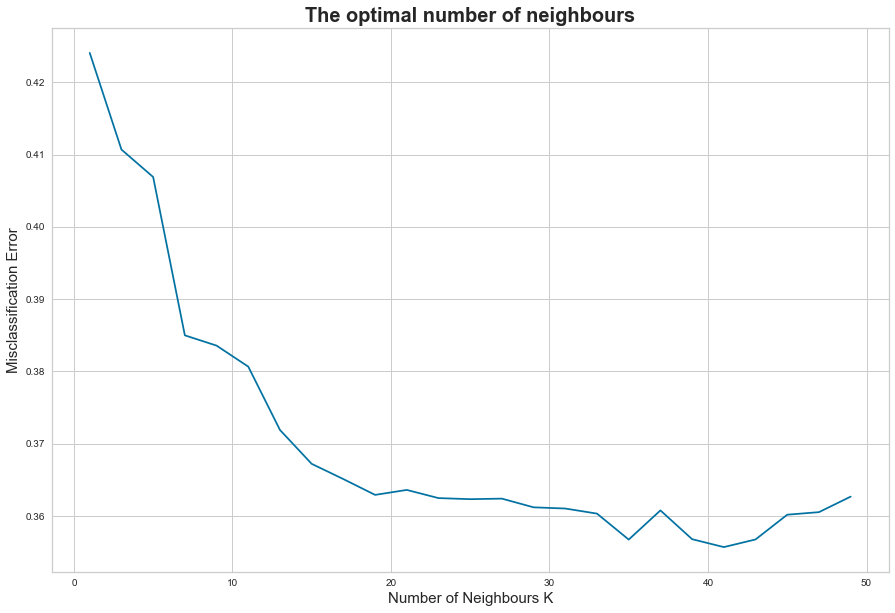

In [20]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize = (15,10))
plt.title('The optimal number of neighbours', fontsize = 20, fontweight = 'bold')
plt.xlabel('Number of Neighbours K', fontsize = 15)
plt.ylabel('Misclassification Error', fontsize = 15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

In [21]:
# finding best k
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbours is %d." % best_k)

The optimal number of neighbours is 41.


# Generate Another K-Nearest Neighbour Model with the Optimal Value of K

In [22]:
# Instantiate learning model
classifier2 = KNeighborsClassifier(n_neighbors=41)

# Fitting the model
classifier2.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier2.predict(X_test)

# Check the Accuracy of the Optimal K Model

In [25]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 64.1 %.


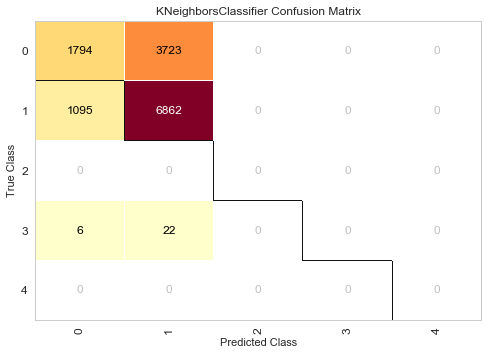

In [27]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(classifier2, classes = [0,1,2,3,4])
cm.score(X_test, y_test)
cm.poof()

# Look at the Misclassification of the Optimal K Model

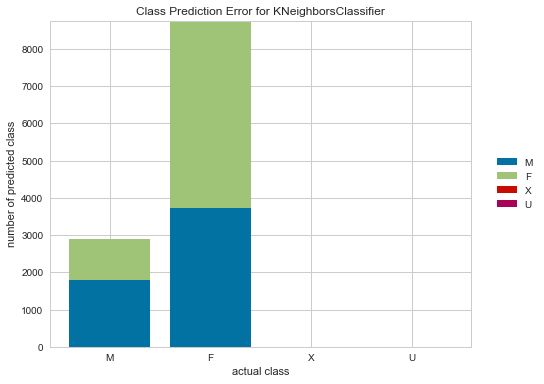

In [30]:
from  yellowbrick.classifier import ClassPredictionError
visualizer = ClassPredictionError(classifier2, classes = ['M','F','X','U'])
visualizer.score(X_test, y_test)
g = visualizer.poof()

# Now Try a Linear Support Vector Machine Classifier Using the Crammer Singer Method for Multi Class Classification

In [10]:
from sklearn import svm
lin_clf = svm.LinearSVC(multi_class = 'crammer_singer')
lin_clf.fit(X_train, y_train)
y_pred = lin_clf.predict(X_test)

# Check the Accuracy of the SVM Model

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 65.06 %.


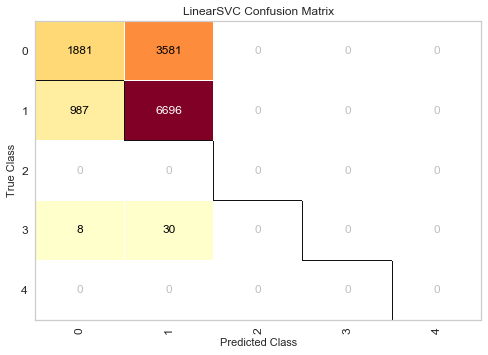

In [13]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(lin_clf, classes = [0,1,2,3,4])
cm.score(X_test, y_test)
cm.poof()

# Look at the Misclassification of the SVM Class Output

In [21]:
from  yellowbrick.classifier import ClassPredictionError
visualizer = ClassPredictionError(lin_clf, classes = ['M','F','X'])
visualizer.score(X_test, y_test)
g = visualizer.poof()

ModelError: y and y_pred contain zero values for one of the specified classes

check distribtuion of the training set and use different test sizes

In [36]:
y_train

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

In [38]:
np.count_nonzero(y_train)

31956

In [42]:
unique, counts = np.unique(y_train, return_counts = True)
dict(zip(unique, counts))

{0: 22057, 1: 31806, 3: 142, 5: 8}

40.84% of the training set is male, 58.89% Female

In [43]:
unique, counts = np.unique(y_test, return_counts = True)
dict(zip(unique, counts))

{0: 5517, 1: 7957, 3: 28, 5: 2}

40.85% of the test set is male 58.92% Female

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 142)

In [2]:
# Instantiate learning model (k = 3)
classifier = KNeighborsClassifier(n_neighbors = 3)

# Fitting the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

NameError: name 'KNeighborsClassifier' is not defined

In [47]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 56.92 %.


In [1]:
# creating list of K for KNN
k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

NameError: name 'KNeighborsClassifier' is not defined